<a href="https://colab.research.google.com/github/piyushkumar-tiwari/RL-Learning/blob/main/RL_B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# --------------------------
# MRP: no actions, only states + transitions
# --------------------------
class MRP:
    def __init__(self, states, transition_matrix, rewards):
        self.states = states
        self.P = transition_matrix
        self.rewards = rewards

    def step(self, current_state):
        idx = self.states.index(current_state)
        next_state = np.random.choice(self.states, p=self.P[idx])
        reward = self.rewards[current_state]
        return next_state, reward


# --------------------------
# MDP: states, actions, transitions depending on actions
# --------------------------
class MDP:
    def __init__(self, states, actions, transition_matrix, rewards):
        """
        transition_matrix: dict {(state, action): prob distribution over next states}
        rewards: dict {(state, action): reward}
        """
        self.states = states
        self.actions = actions
        self.P = transition_matrix
        self.rewards = rewards

    def step(self, current_state, action):
        """Agent chooses action, then environment samples next state"""
        next_state = np.random.choice(
            self.states, p=self.P[(current_state, action)]
        )
        reward = self.rewards[(current_state, action)]
        return next_state, reward


# --------------------------
# Example: Student world
# --------------------------
states = ["Class", "Facebook", "Pub", "Sleep", "Pass"]

# --- MRP setup ---
transition_mrp = np.array([
    [0.5, 0.5, 0.0, 0.0, 0.0],  # Class -> (Class/Facebook)
    [0.1, 0.9, 0.0, 0.0, 0.0],  # Facebook -> Facebook/Class
    [0.2, 0.0, 0.4, 0.4, 0.0],  # Pub -> Class2/Sleep/etc (simplified)
    [0.0, 0.0, 0.0, 1.0, 0.0],  # Sleep -> Sleep
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Pass (terminal)
])
rewards_mrp = {"Class": -2, "Facebook": -1, "Pub": +1, "Sleep": 0, "Pass": +10}

mrp = MRP(states, transition_mrp, rewards_mrp)

# --- MDP setup ---
actions = ["Study", "Facebook", "Pub", "Sleep"]
transition_mdp = {
    ("Class", "Study"): [0.5, 0.0, 0.0, 0.0, 0.5],   # study leads to Class or Pass
    ("Class", "Facebook"): [0.0, 1.0, 0.0, 0.0, 0.0],
    ("Class", "Pub"): [0.0, 0.0, 1.0, 0.0, 0.0],
    ("Class", "Sleep"): [0.0, 0.0, 0.0, 1.0, 0.0],
}
rewards_mdp = {
    ("Class", "Study"): -2,
    ("Class", "Facebook"): -1,
    ("Class", "Pub"): +1,
    ("Class", "Sleep"): 0,
}

mdp = MDP(states, actions, transition_mdp, rewards_mdp)

# --------------------------
# Run small simulations
# --------------------------
def run_mrp(mrp, start_state, steps=10):
    state = start_state
    history = []
    for _ in range(steps):
        state, reward = mrp.step(state)
        history.append((state, reward))
        if state == "Pass":  # terminal
            break
    return pd.DataFrame(history, columns=["State", "Reward"])

def run_mdp(mdp, start_state, steps=10):
    state = start_state
    history = []
    for _ in range(steps):
        # agent chooses action (here random policy)
        action = np.random.choice(mdp.actions)
        state, reward = mdp.step(state, action)
        history.append((action, state, reward))
        if state == "Pass":
            break
    return pd.DataFrame(history, columns=["Action", "State", "Reward"])

# Example runs
print("=== MRP Simulation ===")
print(run_mrp(mrp, "Class"))

print("\n=== MDP Simulation ===")
print(run_mdp(mdp, "Class"))


=== MRP Simulation ===
      State  Reward
0     Class      -2
1  Facebook      -2
2  Facebook      -1
3  Facebook      -1
4     Class      -1
5     Class      -2
6  Facebook      -2
7  Facebook      -1
8  Facebook      -1
9  Facebook      -1

=== MDP Simulation ===
  Action State  Reward
0  Study  Pass      -2


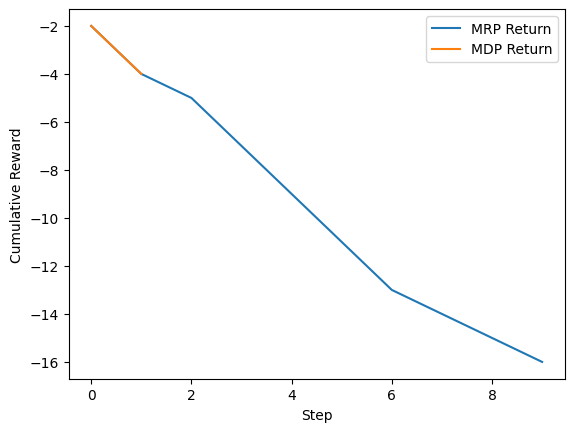

In [ ]:
# Example trajectory
traj_mrp = run_mrp(mrp, "Class")
traj_mdp = run_mdp(mdp, "Class")

plt.plot(traj_mrp["Reward"].cumsum(), label="MRP Return")
plt.plot(traj_mdp["Reward"].cumsum(), label="MDP Return")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()